In [1]:
import pandas as pd
import numpy as np
import datetime as det
import matplotlib.pyplot as plt
# 设置显示中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

In [3]:
Form1 = pd.read_csv(r'C:\Users\Administrator\Desktop\数据可视化\原始数据\(sample)sam_tianchi_mum_baby.csv')
Form2 = pd.read_csv(r'C:\Users\Administrator\Desktop\数据可视化\原始数据\(sample)sam_tianchi_mum_baby_trade_history.csv')           

In [4]:
# 将性别不确定的人数删除
Form1= Form1[-Form1.gender.isin([2])]

In [5]:
# 删除无用字段
Form2.drop(labels='property',axis=1,inplace=True)
Form2.drop(labels='auction_id',axis=1,inplace=True)

In [6]:
# 时间格式化
Form2['day']=pd.to_datetime(Form2['day'],format='%Y%m%d')
# 将用户信息中的生日格式
Form1['ba\irthday']=pd.to_datetime(Form1['birthday'],format='%Y%m%d')

In [7]:
# 添加婴儿生日列
Form1['ba\irthday']=pd.to_datetime(Form1['birthday'],format='%Y%m%d')

In [8]:
# 合并表格
df=pd.merge(Form2,Form1,left_on='user_id',right_on='user_id',how='left')
# 导出表格
# df.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\HeBing.xlsx')

In [9]:
df['month']=df['day'].astype('datetime64[M]')  # 提取购买月份
month_sum=df.groupby(by='month')              # 加一个月份的列
month_excel=month_sum['buy_mount'].sum()      # 求每一个月的销售产品的数量
# 导出产品数量表格
# month_excel.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\MonthlySales.xlsx')

In [10]:
#将每天的售卖数据按照数组存储
df['month_buy']=df['day'].dt.month
df['month_year']=df['day'].astype('datetime64[Y]')
year_month_sales=df.groupby(by=['month_year','month_buy'])['buy_mount'].sum()
# year_month_sales.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\Year_Month_Sales.xlsx')

In [11]:
# 准备数据
sales_2012=year_month_sales['2012-01-01']
sales_2013=year_month_sales['2013-01-01']
sales_2014=year_month_sales['2014-01-01']
sales_2015=year_month_sales['2015-01-01']
year_sales={"2012年":sales_2012.sum(),"2013年":sales_2013.sum(),"2014年":sales_2014.sum(),"2015年":sales_2015.sum()}
Year_Sales = pd.DataFrame()
Year_Sales["年份"] = list(year_sales.keys())
Year_Sales["销售量"] = list(year_sales.values())
# 导出数据表
# Year_Sales.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\Year_Sales.xlsx')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\274677621.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


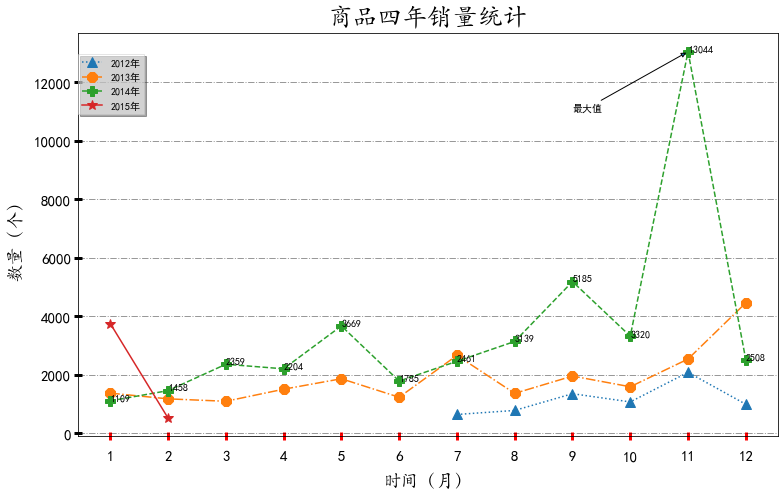

In [12]:
# 商品四年销量统计
# 准备数据
sales_2012=year_month_sales['2012-01-01']
sales_2013=year_month_sales['2013-01-01']
sales_2014=year_month_sales['2014-01-01']
sales_2015=year_month_sales['2015-01-01']
# 调整画布大小
plt.figure(figsize=(11,7))
# 绘制2012-2015年销量折线图
plt.plot(sales_2012.index,sales_2012.values,label='2012年',ls=':',marker='^',ms=10)
plt.plot(sales_2013.index,sales_2013.values,label='2013年',ls='-.',marker='8',ms=10)
plt.plot(sales_2014.index,sales_2014.values,label='2014年',ls='--',marker='P',ms=10)
plt.plot(sales_2015.index,sales_2015.values,label='2015年',ls='-',marker='*',ms=10)
# 设置x轴刻度标签
plt.xticks(sales_2014.index)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加指向性文本注释
plt.annotate("最大值",xy=(11, 13044),xytext=(9, 11000),arrowprops=dict(arrowstyle="-|>")) 
# 设置2014年数字标签
for a, b in zip(sales_2014.index,sales_2014.values):
    plt.text(a,b,b,family='SimHei',fontsize=10,variant='normal')
# 设置x轴标签
plt.xlabel('时间（月）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('商品四年销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
plt.tight_layout()
# 设置图例
plt.legend(loc=[0,0.8],shadow=True,fancybox=False,framealpha=0.5)        

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\2728221311.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')


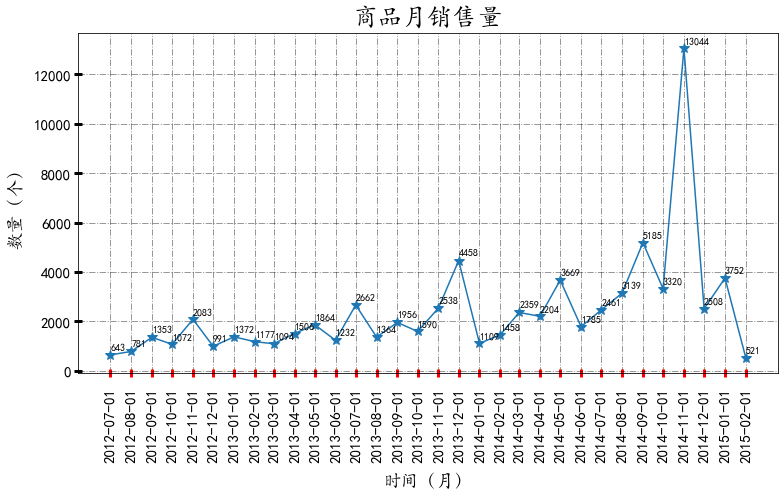

In [13]:
# 商品月销售量
# 调整画布大小
plt.figure(figsize=(11,7))
# 绘制商品月销售量折线图
plt.plot(month_excel.index,month_excel.values,marker='*',ms=10)
# 设置x轴刻度标签
plt.xticks(month_excel.index)
# 设置标题
plt.title('商品月销售量',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴标签
plt.xlabel('时间（月）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# x轴刻度标签 倾斜
plt.xticks(rotation=90)
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 设置数据标注
for a, b in zip(month_excel.index,month_excel.values):
    plt.text(a,b+200,b,family='SimHei',fontsize=10,variant='normal')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\2781477170.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')


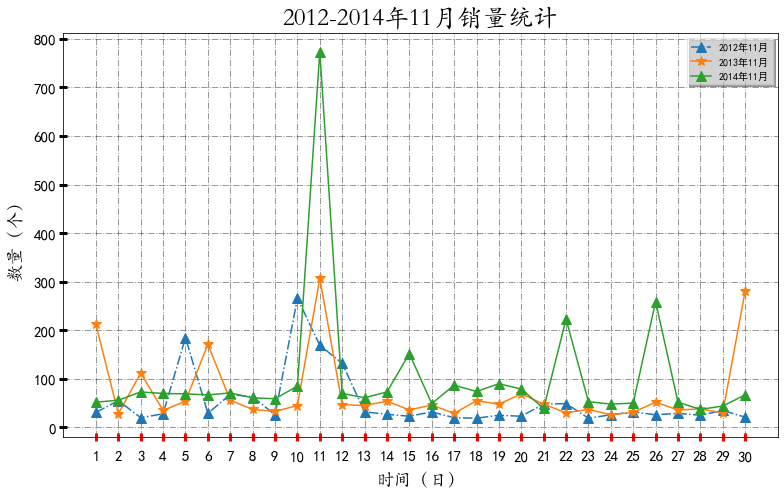

In [38]:
# 每年11月销量统计
# 准备数据
df['day_num']=df['day'].dt.day
df_12_m11=df.query('month_year=="2012-01-01"&month_buy==11')
df_13_m11=df.query('month_year=="2013-01-01"&month_buy==11')
df_14_m11=df.query('month_year=="2014-01-01"&month_buy==11')   
df_12_m11_sale=df_12_m11.groupby('day_num')['buy_mount'].sum()
df_13_m11_sale=df_13_m11.groupby('day_num')['buy_mount'].sum()
df_14_m11_sale=df_14_m11.groupby('day_num')['buy_mount'].sum()
# 删除异常数据
df_12_m11_sale[19]=(df_12_m11_sale[19]-500)
df_13_m11_sale[29]=(df_13_m11_sale[29]-410)
df_14_m11_sale[13]=(df_14_m11_sale[13]-10000)
# 调整画布大小
plt.figure(figsize=(11,7))
# 绘制折线图
plt.plot(df_12_m11_sale.index,df_12_m11_sale.values,label='2012年11月',ls='-.',marker='^',ms=10)
plt.plot(df_13_m11_sale.index,df_13_m11_sale.values,label='2013年11月',ls='-',marker='*',ms=10)
plt.plot(df_14_m11_sale.index,df_14_m11_sale.values,label='2014年11月',ls='-',marker='^',ms=10)
# 设置x轴刻度标签
plt.xticks(df_12_m11_sale.index)
# 设置标题
plt.title('2012-2014年11月销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴标签
plt.xlabel('时间（日）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')
plt.tight_layout()
# 设置图例
plt.legend(shadow=True,fancybox=False,framealpha=0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\3598394576.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')


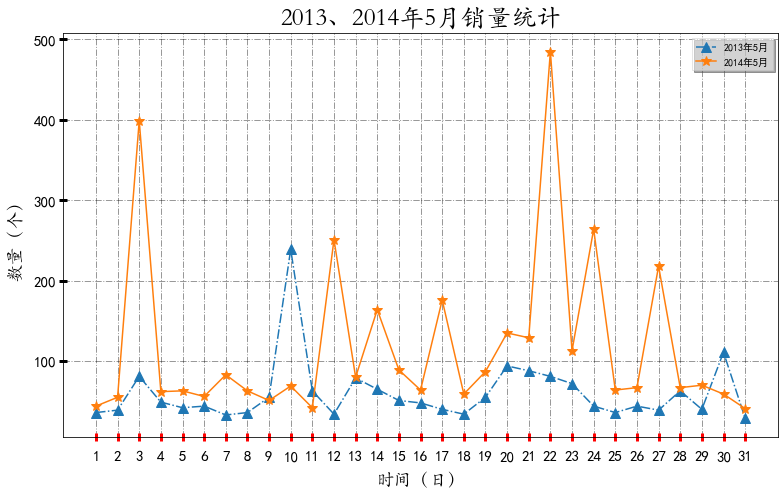

In [39]:
# 2013、2014年5月销量统计，2012、2015年5月没有订单
# 准备数据
df_13_m5=df.query('month_year=="2013-01-01"&month_buy==5')
df_14_m5=df.query('month_year=="2014-01-01"&month_buy==5')
df_13_m5_sale=df_13_m5.groupby('day_num')['buy_mount'].sum()
df_14_m5_sale=df_14_m5.groupby('day_num')['buy_mount'].sum()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制折线图
plt.plot(df_13_m5_sale.index,df_13_m5_sale.values,label='2013年5月',ls='-.',marker='^',ms=10)
plt.plot(df_14_m5_sale.index,df_14_m5_sale.values,label='2014年5月',ls='-',marker='*',ms=10)
# 设置x轴标签
plt.xlabel('时间（日）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('2013、2014年5月销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度标签
plt.xticks(df_13_m5_sale.index)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')
plt.tight_layout()
# 设置图例
plt.legend(shadow=True,fancybox=False,framealpha=0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\2665983891.py:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')


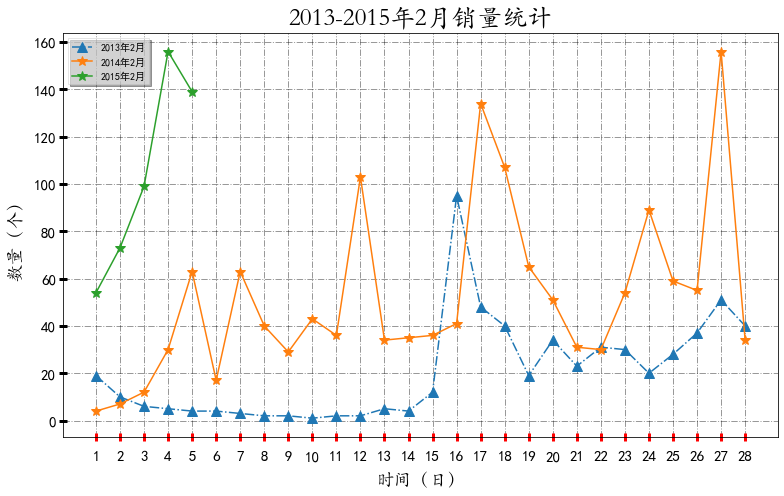

In [35]:
# 2013、2014、2015年2月销量统计
# 准备数据
df_13_m2=df.query('month_year=="2013-01-01"&month_buy==2')
df_14_m2=df.query('month_year=="2014-01-01"&month_buy==2')
df_15_m2=df.query('month_year=="2015-01-01"&month_buy==2')
df_13_m2_sale=df_13_m2.groupby('day_num')['buy_mount'].sum()
df_14_m2_sale=df_14_m2.groupby('day_num')['buy_mount'].sum()
df_15_m2_sale=df_15_m2.groupby('day_num')['buy_mount'].sum()
# 删除异常数据
df_13_m2_sale[22]=(df_13_m2_sale[22]-600)
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制折线图
plt.plot(df_13_m2_sale.index,df_13_m2_sale.values,label='2013年2月',ls='-.',marker='^',ms=10)
plt.plot(df_14_m2_sale.index,df_14_m2_sale.values,label='2014年2月',ls='-',marker='*',ms=10)
plt.plot(df_15_m2_sale.index,df_15_m2_sale.values,label='2015年2月',ls='-',marker='*',ms=10)
# 设置x轴标签
plt.xlabel('时间（日）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('2013-2015年2月销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度标签
plt.xticks(df_13_m2_sale.index)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='both',linewidth=1,color='k',alpha=0.4,linestyle='-.')
plt.tight_layout()
# 设置图例
plt.legend(shadow=True,fancybox=False,framealpha=0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\2926962772.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

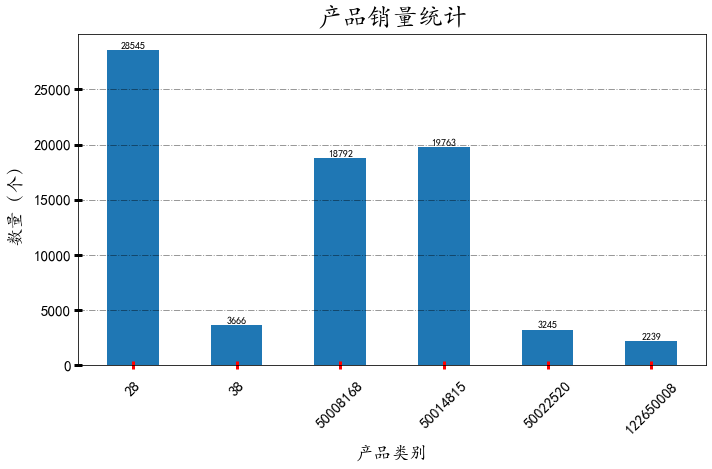

In [17]:
# 产品销量统计
# 准备数据
# 用根据 商品的一阶分类 产品销量 作图
cat1_sales=df.groupby('cat1')['buy_mount'].sum()
# cat1_sales.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\Cat1_Sales.xlsx')
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制折线图
plt.bar(cat1_sales.index.astype('str'),cat1_sales.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('产品销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(cat1_sales.index.astype('str'), cat1_sales.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45)

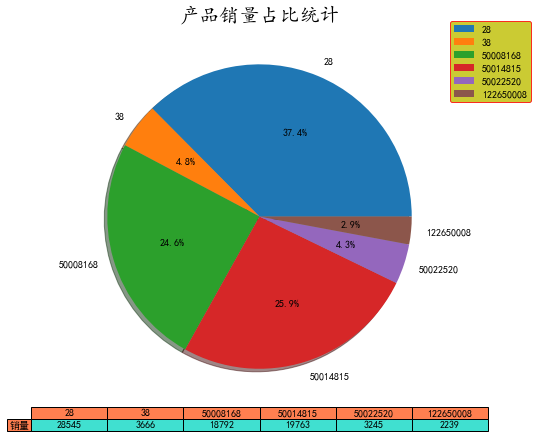

In [18]:
# 产品销量占比统计
# 准备数据
cat1_sales_cat1 = cat1_sales.index.astype('str').tolist()
cat1_sales_mount = cat1_sales.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=cat1_sales_mount,labels=cat1_sales_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=cat1_sales_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('产品销量占比统计',fontproperties='STKAITI',fontsize=20)
# 添加表格
plt.table(cellText=[cat1_sales_mount],rowLabels=["销量"],colLabels=cat1_sales_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\1631962963.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

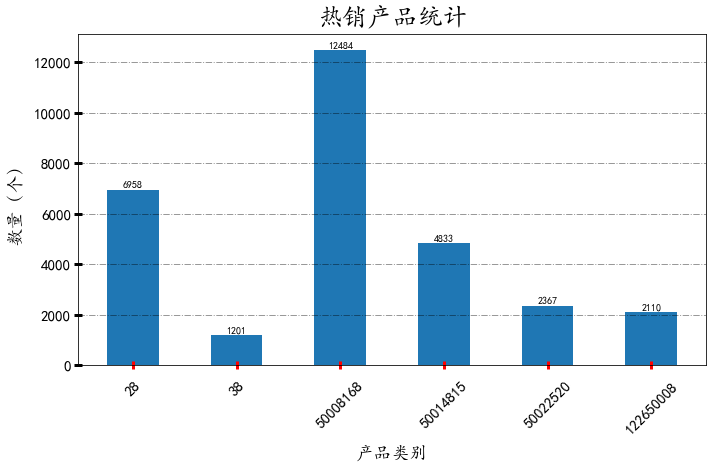

In [19]:
# 热销产品统计
# 准备数据
# 根据 第一次和最后一次的购买时间 判断是否为新用户
df_1=df.groupby(by='user_id')['day'].agg(['first','last']) 
cat1_user_count=df.groupby('cat1')['user_id'].nunique()
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(cat1_user_count.index.astype('str'),cat1_user_count.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('热销产品统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(cat1_user_count.index.astype('str'), cat1_user_count.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45)

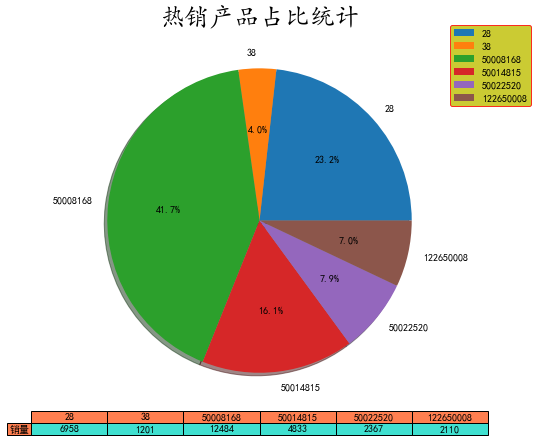

In [20]:
# 热销产品占比统计
# 准备数据
cat1_user_counts_cat1 = cat1_user_count.index.astype('str').tolist()
cat1_user_count_mount = cat1_user_count.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=cat1_user_count_mount,labels=cat1_user_counts_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=cat1_user_counts_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('热销产品占比统计',fontproperties='STKAITI',fontsize=25)
# 添加表格
plt.table(cellText=[cat1_user_count_mount],rowLabels=["销量"],colLabels=cat1_user_counts_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\2837442706.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

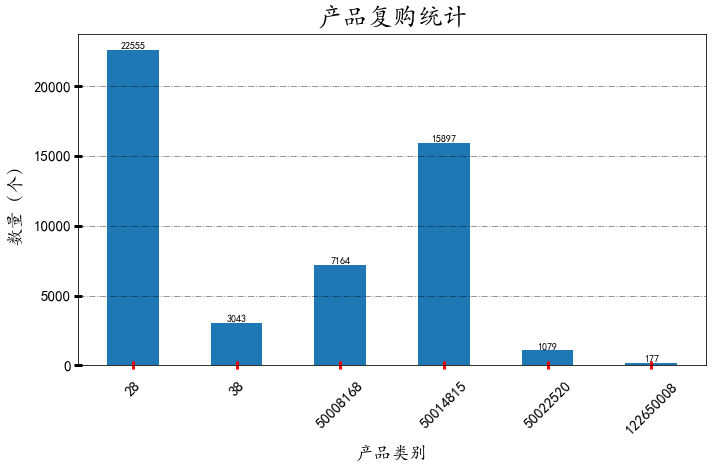

In [21]:
# 产品复购统计
# 准备数据
df_2 = pd.read_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\HeBing.xlsx', index_col=None, na_values=['NA'])
df_2 = df[df['buy_mount']>=2]
cat1_sales_fugou=df_2.groupby('cat1')['buy_mount'].sum()
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(cat1_sales_fugou.index.astype('str'),cat1_sales_fugou.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('产品复购统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(cat1_sales_fugou.index.astype('str'), cat1_sales_fugou.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45)   

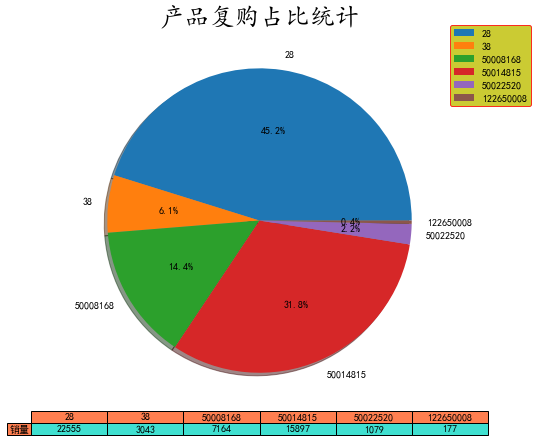

In [22]:
# 产品复购占比统计
# 准备数据
cat1_sales_fugou_cat1 = cat1_sales_fugou.index.astype('str').tolist()
cat1_sales_fugou_mount = cat1_sales_fugou.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=cat1_sales_fugou_mount,labels=cat1_sales_fugou_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=cat1_sales_fugou_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('产品复购占比统计',fontproperties='STKAITI',fontsize=25)
# 添加表格
plt.table(cellText=[cat1_sales_fugou_mount],rowLabels=["销量"],colLabels=cat1_sales_fugou_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\340746943.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


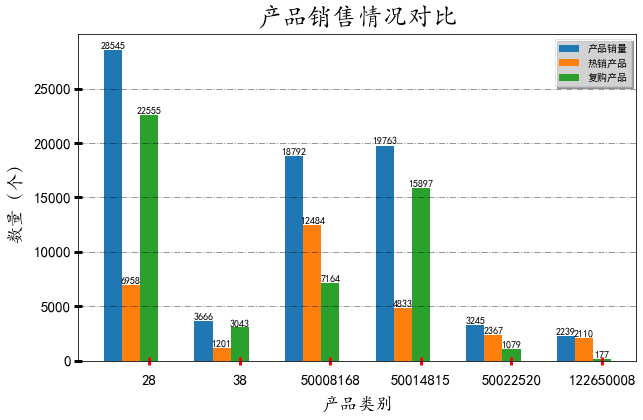

In [23]:
# 产品销售情况对比图
# 准备数据
bar_width=0.2
x = np.array([1,2,3,4,5,6])
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制图表
plt.bar(x,cat1_sales_mount,tick_label=cat1_sales_cat1,width=bar_width,label='产品销量')
plt.bar(x+bar_width,cat1_user_count_mount,tick_label=cat1_user_counts_cat1,width=bar_width,label='热销产品')
plt.bar(x+bar_width*2,cat1_sales_fugou_mount,tick_label=cat1_sales_fugou_cat1,width=bar_width,label='复购产品')
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('产品销售情况对比',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(x, cat1_sales.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
# 添加数据标注
for a, b in zip(x+bar_width, cat1_user_count.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
# 添加数据标注
for a, b in zip(x+bar_width*2, cat1_sales_fugou.values):
    plt.text(a, b + 10, b, ha='center', va='bottom')
# 设置标题
plt.legend(shadow=True,fancybox=False,framealpha=0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\1829195987.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

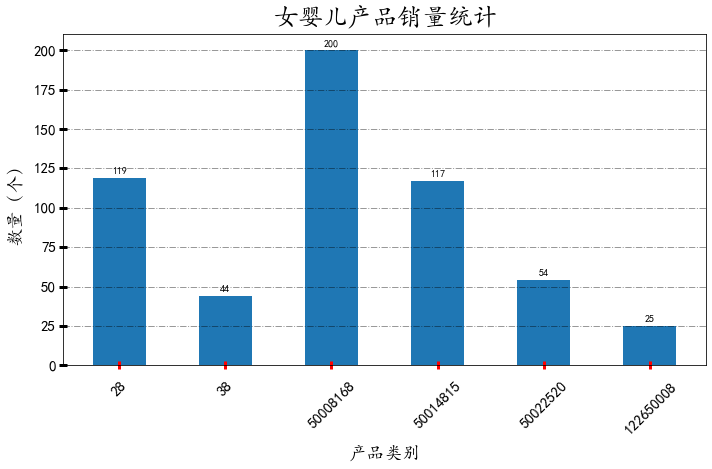

In [24]:
# 女婴儿产品销量统计
# 准备数据
gender_mount=df.groupby(by=['gender','cat1'])['buy_mount'].sum()
gender_mount_female=gender_mount[1.0]
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(gender_mount_female.index.astype('str'),gender_mount_female.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('女婴儿产品销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(gender_mount_female.index.astype('str'), gender_mount_female.values):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45)

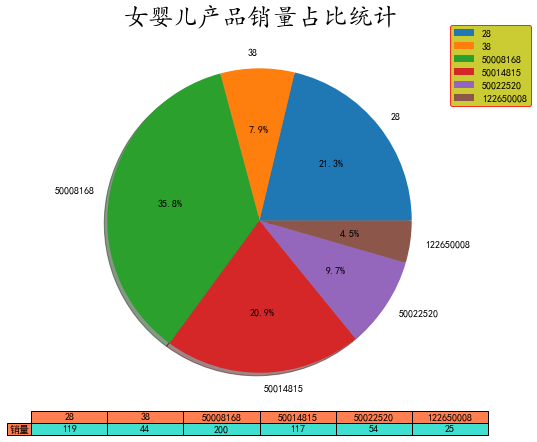

In [25]:
# 女婴儿产品销量占比统计
# 准备数据
gender_mount_female_cat1 = gender_mount_female.index.astype('str').tolist()
gender_mount_female_mount = gender_mount_female.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=gender_mount_female_mount,labels=gender_mount_female_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=gender_mount_female_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('女婴儿产品销量占比统计',fontproperties='STKAITI',fontsize=25)
# 添加表格
plt.table(cellText=[gender_mount_female_mount],rowLabels=["销量"],colLabels=gender_mount_female_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\1658982737.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

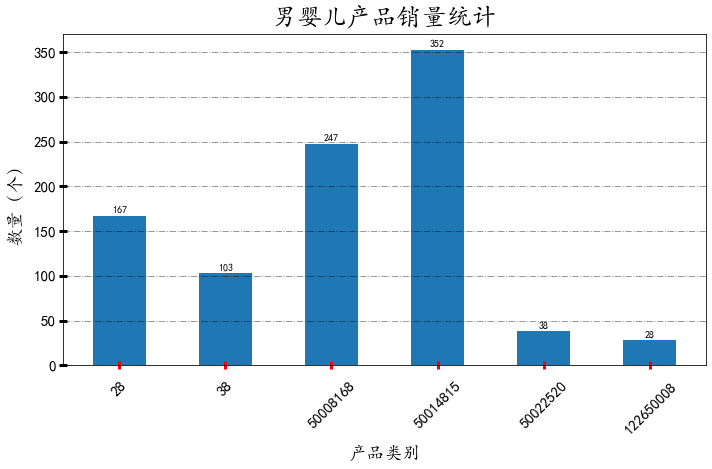

In [26]:
# 男婴儿产品销量统计
# 准备数据
gender_mount_male=gender_mount[0.0]
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(gender_mount_male.index.astype('str'),gender_mount_male.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('男婴儿产品销量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(gender_mount_male.index.astype('str'), gender_mount_male.values):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45) 

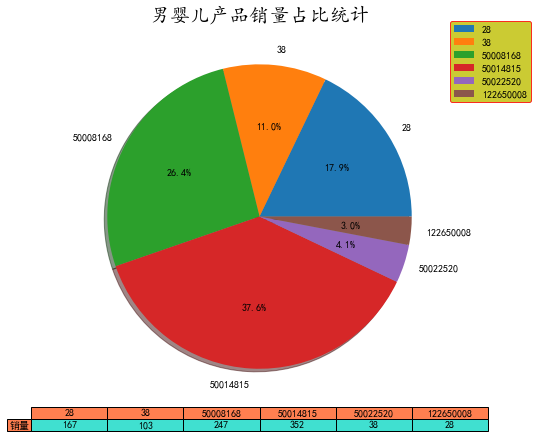

In [27]:
# 男婴儿产品销量占比统计
# 准备数据
gender_mount_male_cat1 = gender_mount_male.index.astype('str').tolist()
gender_mount_male_mount = gender_mount_male.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=gender_mount_male_mount,labels=gender_mount_male_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=gender_mount_male_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('男婴儿产品销量占比统计',fontproperties='STKAITI',fontsize=20)
# 添加表格
plt.table(cellText=[gender_mount_male_mount],rowLabels=["销量"],colLabels=gender_mount_male_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\643560119.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


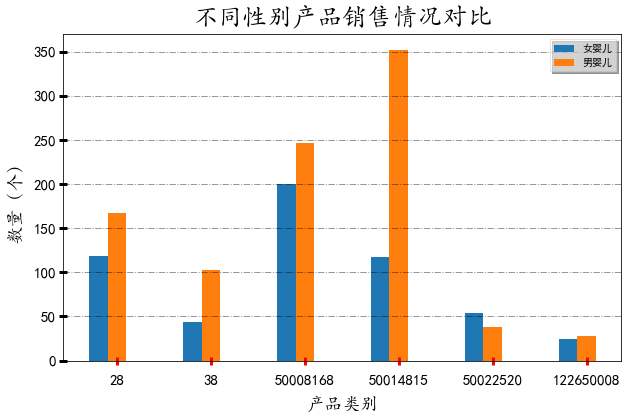

In [28]:
# 不同性别产品销售情况堆积图
# 准备数据
bar_width=0.2
x = np.array([1,2,3,4,5,6])
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制堆积图
plt.bar(x,gender_mount_female_mount,tick_label=gender_mount_female_cat1,width=bar_width,label='女婴儿')
plt.bar(x+bar_width,gender_mount_male_mount,tick_label=gender_mount_male_cat1,width=bar_width,label='男婴儿')
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('不同性别产品销售情况对比',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 设置标题
plt.legend(shadow=True,fancybox=False,framealpha=0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\3655464792.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0')])

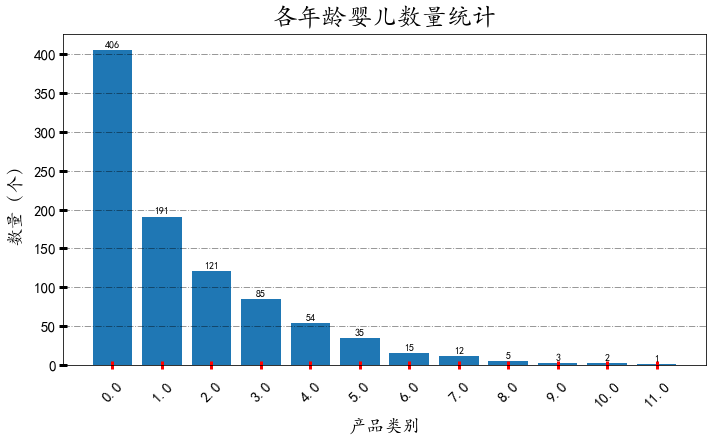

In [29]:
# 各年龄婴儿数量统计
# 准备数据
Form3 = pd.read_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\HeBing.xlsx', index_col=None, na_values=['NA'])
age_count=Form3['age'].value_counts()
# 导出表格
# age_count.to_excel(r'C:\Users\Administrator\Desktop\数据可视化\清洗后数据\Age_Count.xlsx')
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(age_count.index.astype('str'),age_count.values)  # 统计 各年龄段婴儿的数量
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('各年龄婴儿数量统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(age_count.index.astype('str'), age_count.values):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45) 

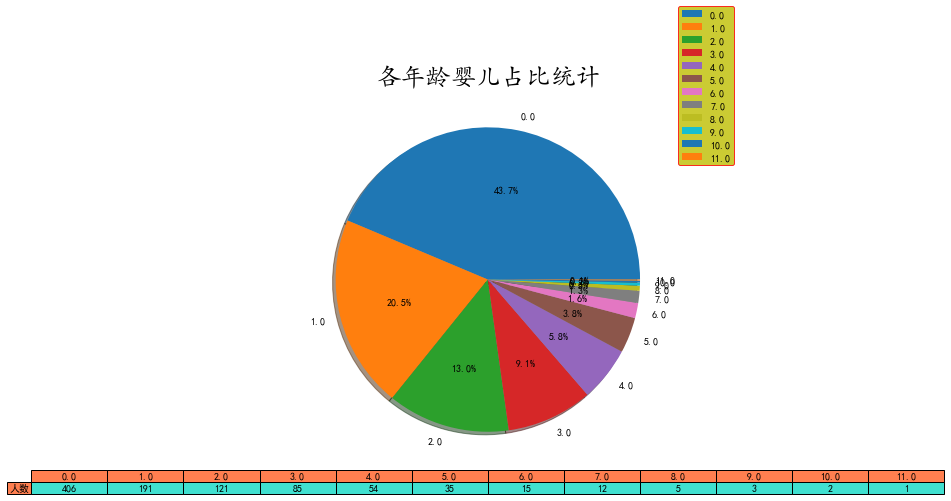

In [30]:
# 各年龄婴儿占比统计
# 准备数据
age_count_cat1 = age_count.index.astype('str').tolist()
age_count_mount = age_count.values.tolist()
cellColours = ['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']
colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral','coral', 'coral', 'coral', 'coral', 'coral', 'coral']
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=age_count_mount,labels=age_count_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=age_count_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('各年龄婴儿占比统计',fontproperties='STKAITI',fontsize=25)
# 添加表格
plt.table(cellText=[age_count_mount],rowLabels=["人数"],colLabels=age_count_cat1,
          loc='bottom',colWidths=[0.2]*12,cellLoc='center',
          cellColours=[cellColours],rowColours=['coral'],
          colColours=colColours) 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\1447272528.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '28'),
  Text(1, 0, '38'),
  Text(2, 0, '50008168'),
  Text(3, 0, '50014815'),
  Text(4, 0, '50022520'),
  Text(5, 0, '122650008')])

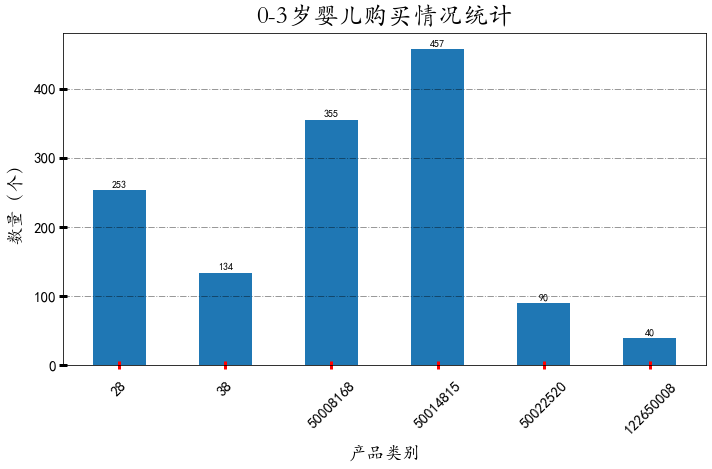

In [31]:
# 0-3岁婴儿购买情况统计
# 准备数据
Form3_0_3 = Form3[Form3['age']<=3]
cat1_sales_03=Form3_0_3.groupby('cat1')['buy_mount'].sum()
# 设置画布大小
plt.figure(figsize=(10,6))
# 绘制条形图
plt.bar(cat1_sales_03.index.astype('str'),cat1_sales_03.values,width=0.5)
# 设置x轴标签
plt.xlabel('产品类别',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置y轴标签
plt.ylabel('数量（个）',fontproperties='STKAITI',fontsize=18,labelpad=10)
# 设置标题
plt.title('0-3岁婴儿购买情况统计',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线 
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
# 设置网格
plt.grid(b=True,which='major',axis='y',linewidth=1,color='k',alpha=0.4,linestyle='-.')
# 添加数据标注
for a, b in zip(cat1_sales_03.index.astype('str'), cat1_sales_03.values):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(rotation=45) 

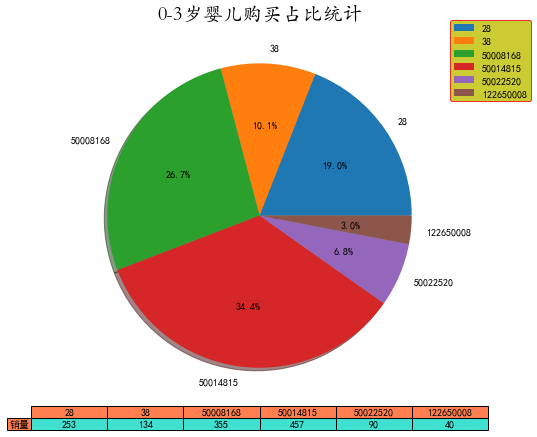

In [32]:
# 0-3岁婴儿购买占比统计
# 准备数据
cat1_sales_03_cat1 = cat1_sales_03.index.astype('str').tolist()
cat1_sales_03_mount = cat1_sales_03.values.tolist()
# 设置画布大小
plt.figure(figsize=(11,7))
# 绘制饼图
plt.pie(x=cat1_sales_03_mount,labels=cat1_sales_03_cat1,autopct='%.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1)
# 设置图例
plt.legend(labels=cat1_sales_03_cat1,loc=[1,0.8],facecolor='y',edgecolor = 'r')
# 设置标题
plt.title('0-3岁婴儿购买占比统计',fontproperties='STKAITI',fontsize=20)
# 添加表格
plt.table(cellText=[cat1_sales_03_mount],rowLabels=["销量"],colLabels=cat1_sales_03_cat1,
          loc='bottom',colWidths=[0.2]*6,cellLoc='center',
          cellColours=[['turquoise','turquoise','turquoise','turquoise','turquoise','turquoise']],
          rowColours=['coral'],colColours=['coral', 'coral', 'coral', 'coral', 'coral', 'coral']) 